In [243]:
import json
import pandas as pd
import numpy as np
import re

In [244]:
with open('wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [245]:
len(wiki_movies_raw)

7311

In [246]:
# First 5 records
wiki_movies_raw[:5]

# Some records in the middle
wiki_movies_raw[3600:3605]

# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [247]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.columns.tolist()
wiki_movies_df.sample()


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
532,https://en.wikipedia.org/wiki/Highway_to_Hell_...,1992.0,https://www.imdb.com/title/tt0104418/,Highway to Hell,Ate de Jong,"[John Byers, Mary Ann Page]",NaN,NaN,NaN,"[Patrick Bergin, Adam Storke, Chad Lowe, Krist...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
                  and ('imdb_link' in movie) 
                  and ('No. of episodes' not in movie)]

In [249]:
wiki_movies_df = pd.DataFrame(wiki_movies)
sorted(wiki_movies_df.columns.tolist())
wiki_movies_df.sample()


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1826,https://en.wikipedia.org/wiki/Bongwater_(film),1997,https://www.imdb.com/title/tt0125678/,Bongwater,Richard Sears,"[Laura Bickford, Alessandro F. Uzielli]","[Nora Maccoby, Eric Weiss]",NaN,"[Bongwater, by, Michael Hornburg]","[Luke Wilson, Alicia Witt, Jack Black, Brittan...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
def clean_movie(movie):
    # Create a non-destructive copy
    movie = dict(movie)
    alt_titles = {}
    # Combine alternate titles into one list
    for key in ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French',
               'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Literally',
               'Mandarin', 'McCune–Reischauer', 'Original title', 'Polish',
               'Revised Romanization', 'Romanized', 'Russian',
               'Simplified', 'Traditional', 'Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    # Merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')    
    return movie


In [251]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]


In [252]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns)
wiki_movies_df.sample()


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Followed by,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process
561,https://en.wikipedia.org/wiki/Mo%27_Money,1992,https://www.imdb.com/title/tt0104897/,Mo' Money,NaN,"[Damon Wayans, Stacey Dash, Joe Santos, John D...",NaN,Don Burgess,"[July 24, 1992, (, 1992-07-24, )]",89 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.sample()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
5537,https://en.wikipedia.org/wiki/The_Dark_Knight_...,2012,https://www.imdb.com/title/tt1345836/,The Dark Knight Rises,[Characters appearing in comic books published...,"[Christian Bale, Michael Caine, Gary Oldman, A...",NaN,Wally Pfister,"[July 16, 2012, (, 2012-07-16, ), (New York Ci...",165 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1345836


In [254]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]


[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [255]:
wiki_columns_to_keep = [col for col in wiki_movies_df.columns if wiki_movies_df[col].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.sample()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
5752,https://en.wikipedia.org/wiki/At_Any_Price_(film),2013,https://www.imdb.com/title/tt1937449/,At Any Price,NaN,"[Dennis Quaid, Zac Efron, Kim Dickens, Heather...",Michael Simmonds,"[August 30, 2012, (, 2012-08-30, ), (, Venice,...",104 minutes,United States,...,NaN,"$487,455",Ramin Bahrani,Sony Pictures Classics,Douglas Aibel,Dickon Hinchliffe,"[Ramin Bahrani, Pamela Koffler, Justin Nappi, ...","[Big Indie Pictures, Black Bear Pictures, Cine...","[Ramin Bahrani, Hallie Elizabeth Newton]",tt1937449


In [256]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [257]:
box_office = wiki_movies_df['Box office'].dropna()

In [258]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [259]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)


In [260]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3903

In [261]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?![\s[mb]illion])'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1595

In [262]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)
box_office[~matches_form_one & ~matches_form_two]

110              $4.35-4.37 million
600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3088      $32 [2] –33.1 million [1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4261             $20.7–23.9 million
4306                         $20-30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6145             $17.5–18.4 million
6234             $41.8–41.9 million
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [263]:
box_office = box_office.str.replace(r'\$\d.*[-–](?![a-z])', '$', regex=True)


In [264]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)
        # convert to float
        value = float(s)
        # return value
        return value
    
    # otherwise, return NaN
    else:
        return np.nan

In [265]:
# What about numbers that used decimal points a commas?

In [266]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Box office', axis=1, inplace=True)
wiki_movies_df.sample()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
5569,https://en.wikipedia.org/wiki/Excision_(film),2012,https://www.imdb.com/title/tt1984153/,Excision,NaN,"[AnnaLynne McCord, Traci Lords, Ariel Winter, ...",Itay Gross,"[January 21, 2012, (, 2012-01-21, ), (, Sundan...",81 minutes,United States,...,NaN,"Richard Bates, Jr.",Anchor Bay Films,"[Yvonne Valdez, Steve Ansell]","[Steve Damstra II, Mads Heldtberg]",Dylan Hale Lewis,BXR Productions,"Richard Bates, Jr.",tt1984153,NaN


In [267]:
budget = wiki_movies_df['Budget'].dropna()
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-–](?![a-z])', '$', regex=True)
budget = budget.str.replace(r'\[\d+\]\s*', '')

In [268]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [269]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)
wiki_movies_df.sample()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget
5765,https://en.wikipedia.org/wiki/Beside_Still_Wat...,2013,https://www.imdb.com/title/tt2184398/,Beside Still Waters,NaN,"[Ryan Eggold, Britt Lower, Brett Dalton, Reid ...",Timothy Naylor,"[October 12, 2013, (, 2013-10-12, ), (, MVFF, ...",76 minutes,United States,...,Chris Lowell,NaN,Nick Houy,NaN,"Chris Lowell, Steven Gorel, Jason Potash, Paul...",Storyboard Entertainment,"[Chris Lowell, Mohit Narang]",tt2184398,NaN,207061.0


In [270]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [271]:
date_form_one = r'(?:January|Feburary|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|Feburary|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [272]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)[0], infer_datetime_format=True)
# Drop the old column?
wiki_movies_df.drop('Release date', axis=1, inplace=True)
wiki_movies_df.sample()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Running time,Country,Language,...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date
5678,https://en.wikipedia.org/wiki/Ruby_Sparks,2012,https://www.imdb.com/title/tt1839492/,Ruby Sparks,NaN,"[Paul Dano, Zoe Kazan, Annette Bening, Antonio...",Matthew Libatique,104 minutes,United States,English,...,Fox Searchlight Pictures,Pamela Martin,Nick Urata,"[Albert Berger, Ron Yerxa]",Bona Fide Productions,Zoe Kazan,tt1839492,9100000.0,NaN,2012-07-25


In [273]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]


668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [274]:
running_time_extract = running_time.str.extract(r'(\d+)\s?ho?u?r?s?\s?(\d*)|(\d+)\s*m')
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)


In [275]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df.sample()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Country,Language,Director,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
4369,https://en.wikipedia.org/wiki/Daddy_Day_Camp,2007,https://www.imdb.com/title/tt0462244/,Daddy Day Camp,"[Characters, by Geoff Rodkey]","[Cuba Gooding Jr., Lochlyn Munro, Richard Gant...",Geno Salvatori,United States,English,Fred Savage,...,Michel Aller,Jim Dooley,"[William Sherak, Jason Shuman]","[Revolution Studios, Davis Entertainment Compa...","[Geoff Rodkey, Joel Cohen, Alec Sokolow]",tt0462244,18200000.0,6000000.0,2007-01-01,89.0


In [276]:
file_dir = '../Data/'

In [277]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [278]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')


In [279]:
#kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
#kaggle_metadata['video'] = kaggle_metadata['video'] == True


In [280]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [281]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


In [282]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki', '_kaggle'])
movies_df.sample()
movies_df.dtypes

url                              object
year                              int64
imdb_link                        object
title_wiki                       object
Based on                         object
Starring                         object
Cinematography                   object
Country                          object
Language                         object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Writer(s)                        object
imdb_id                          object
box_office                      float64
budget_wiki                     float64
release_date_wiki        datetime64[ns]
running_time                    float64
belongs_to_collection            object
budget_kaggle                     int64
genres                           object
homepage                         object


In [284]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop Wikipedia
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data
# budget_wiki              budget_kaggle            Keep Kaggle; fill in zeros with Wikipedia data
# box_office               revenue                  Keep Kaggle; fill in zeros with Wikipedia data
# release_date_wiki        release_date_kaggle      Drop Wikipedia
# Language                 original_language        Drop Wikipedia
# Production company(s)    production_companies     Drop Wikipedia


In [285]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [286]:
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


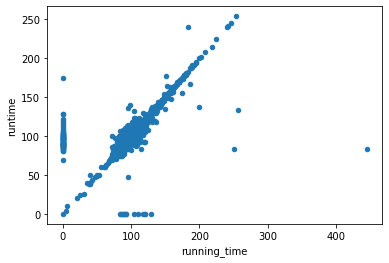

In [287]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [288]:
# How do you know for which which dataset has more outliers?

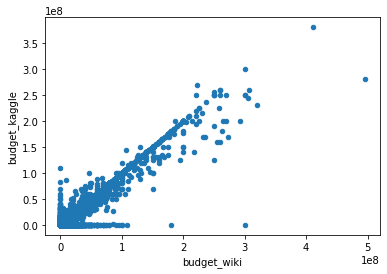

In [289]:
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')


In [290]:
# Keep Kaggle; fill in zeros with Wikipedia data

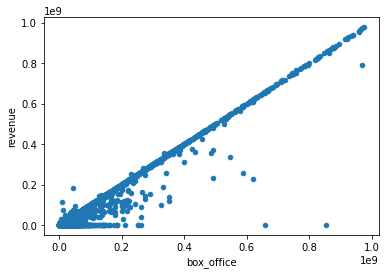

In [291]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')


In [292]:
# Keep Kaggle; fill in zeros with Wikipedia data

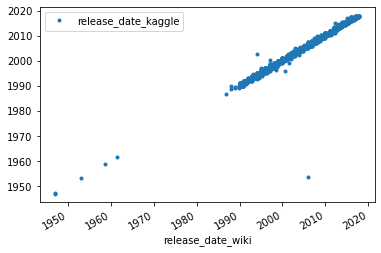

In [293]:
movies_df.plot(x='release_date_wiki', y = 'release_date_kaggle', style='.')


In [294]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1995-01-01') & (movies_df['release_date_kaggle'] < '1970-01-01')].index)


In [295]:
print(len(movies_df[movies_df['release_date_wiki'].isnull()]))
print(len(movies_df[movies_df['release_date_kaggle'].isnull()]))


11
0


In [296]:
# Drop Wikipedia

In [297]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)


English                              5479
NaN                                   134
(English, Spanish)                     68
(English, French)                      35
(English, Japanese)                    25
                                     ... 
Various languages                       1
(English, Indonesian)                   1
(Korean, English)                       1
(English, Spanish, Inuktitut)           1
(English, French, Khmer, Russian)       1
Name: Language, Length: 198, dtype: int64

In [298]:
movies_df['original_language'].value_counts(dropna=False)


en    5987
fr      16
es      10
it       8
de       6
ja       4
zh       4
pt       4
hi       2
da       2
cn       1
he       1
ab       1
tr       1
ru       1
sv       1
ar       1
ko       1
Name: original_language, dtype: int64

In [299]:
# Drop Wikipedia

In [300]:
movies_df[['Production company(s)', 'production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [301]:
# Drop Wikipedia

In [302]:
movies_df.drop(columns=['title_wiki', 'release_date_wiki', 'Language', 'Production company(s)'], inplace=True)


In [303]:
def fill_missing_kaggle_data(df, kaggle_col, wiki_col):
    df[kaggle_col] = df.apply(
        lambda row: row[wiki_col] if row[kaggle_col] == 0 else row[kaggle_col], axis=1
    )
    df.drop(columns=wiki_col, inplace=True)

In [304]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df.sample()

,url,year,imdb_link,Based on,Starring,Cinematography,Country,Director,Distributor,Editor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1706,https://en.wikipedia.org/wiki/Paradise_Road_(1...,1997,https://www.imdb.com/title/tt0119859/,"[The diaries of, Betty Jeffrey]","[Glenn Close, Frances McDormand, Pauline Colli...",Peter James,Australia,Bruce Beresford,"[Fox Searchlight Pictures, 20th Century Fox]",Tim Wellburn,...,1997-04-11,2007100.0,122.0,[],Released,NaN,Paradise Road,False,6.2,21.0


In [309]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

In [306]:
movies_df['video'].value_counts(dropna=False)

False    6050
True        1
Name: video, dtype: int64

In [308]:
# The previous for loop can be replaced with the following list comprehension
[col for col in movies_df.columns if 
     len(movies_df[col].apply(
         lambda x: tuple(x) if type(x) == list else x)
         .value_counts(dropna=False)) == 1]

[]

In [311]:
movies_df = movies_df.loc[:, [
    'imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
    'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
    'genres','original_language','overview','spoken_languages','Country', 'production_companies', 
    'production_countries','Distributor', 'Producer(s)','Director','Starring','Cinematography',
    'Editor(s)','Writer(s)','Composer(s)','Based on']]
movies_df.sample()

,imdb_id,id,title_kaggle,original_title,tagline,belongs_to_collection,url,imdb_link,runtime,budget_kaggle,...,production_countries,Distributor,Producer(s),Director,Starring,Cinematography,Editor(s),Writer(s),Composer(s),Based on
3412,tt0422528,16156,Sarah Silverman: Jesus Is Magic,Sarah Silverman: Jesus Is Magic,NaN,NaN,https://en.wikipedia.org/wiki/Sarah_Silverman:...,https://www.imdb.com/title/tt0422528/,70.0,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Roadside Attractions,"[Heidi Herzon, Grant Jue, Randy Sosin, Mark Wi...",Liam Lynch,"[Sarah Silverman, Laura Silverman, Brian Poseh...",Rhet W. Bear,Liam Lynch,Sarah Silverman,"[Liam Lynch, Sarah Silverman]",NaN


In [312]:
movies_df.rename({
    'id':'kaggle_id',
    'title_kaggle':'title',
    'url':'wikipedia_url',
    'budget_kaggle':'budget',
    'release_date_kaggle':'release_date',
    'Country':'country',
    'Distributor':'distributor',
    'Producer(s)':'producers',
    'Director':'director',
    'Starring':'starring',
    'Cinematography':'cinematography',
    'Editor(s)':'editors',
    'Writer(s)':'writers',
    'Composer(s)':'composers',
    'Based on':'based_on'},
    axis='columns', inplace=True)